In [75]:
# import for numerical competition, data manipulation, data visualization, and deep learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler#change the format into (0,1)
from tensorflow.keras.models import Sequential  # Modified import for Keras
from tensorflow.keras.layers import Dense, LSTM, Dropout  # Modified import for Keras

In [76]:
#from pandas
df =pd.read_csv('/Users/jayant/Downloads/datasetsandcodefilesstockmarketprediction/Google_train_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [77]:
# Create a DataFrame with matching lengths for 'date' and 'value'
df = {'date': pd.date_range(start='2015-01-01', end='2019-01-01'),
      'value': range(len(pd.date_range(start='2015-01-01', end='2019-01-01')))}
data = pd.DataFrame(df)

# Set 'date' as the index for better date-based slicing
data.set_index('date', inplace=True)

# Define the start and end dates
start_date = '2015-01-01'
end_date = '2019-01-01'

# Select rows based on the date range
selected_data = data.loc[start_date:end_date]

# Print the selected data
print(selected_data)


            value
date             
2015-01-01      0
2015-01-02      1
2015-01-03      2
2015-01-04      3
2015-01-05      4
...           ...
2018-12-28   1457
2018-12-29   1458
2018-12-30   1459
2018-12-31   1460
2019-01-01   1461

[1462 rows x 1 columns]


In [78]:
df = {'date': pd.date_range(start='2015-01-01', end='2019-01-01'),
      'Close': range(len(pd.date_range(start='2015-01-01', end='2019-01-01')))}
data = pd.DataFrame(df)

# Set 'date' as the index for better date-based slicing
data.set_index('date', inplace=True)

# Convert 'Close' column to numeric
data["Close"] = pd.to_numeric(data["Close"], errors='coerce')

# Drop rows with NaN values after conversion
data = data.dropna()

# Extract the 'Close' column as trainData
trainData = data.iloc[:, 0:1].values

# Print the selected data
print(trainData)

[[   0]
 [   1]
 [   2]
 ...
 [1459]
 [1460]
 [1461]]


In [79]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1462, 1)

In [80]:
X_train=[]
y_train=[]
#60:timestep // 1149:Lenght of data
for i in range (60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [81]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [89]:
model=Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0,2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0,2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0,2)) 

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0,2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [90]:
hist =model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
35/35 - 5s - loss: 0.0342 - 5s/epoch - 131ms/step
Epoch 2/20
35/35 - 2s - loss: 0.0011 - 2s/epoch - 62ms/step
Epoch 3/20
35/35 - 2s - loss: 4.1469e-05 - 2s/epoch - 63ms/step
Epoch 4/20
35/35 - 2s - loss: 5.0602e-06 - 2s/epoch - 64ms/step
Epoch 5/20
35/35 - 2s - loss: 3.3024e-06 - 2s/epoch - 65ms/step
Epoch 6/20
35/35 - 2s - loss: 3.6023e-06 - 2s/epoch - 64ms/step
Epoch 7/20
35/35 - 2s - loss: 2.5981e-06 - 2s/epoch - 64ms/step
Epoch 8/20
35/35 - 2s - loss: 2.5042e-06 - 2s/epoch - 64ms/step
Epoch 9/20
35/35 - 2s - loss: 2.4353e-06 - 2s/epoch - 64ms/step
Epoch 10/20
35/35 - 2s - loss: 2.6512e-06 - 2s/epoch - 64ms/step
Epoch 11/20
35/35 - 2s - loss: 2.6606e-06 - 2s/epoch - 64ms/step
Epoch 12/20
35/35 - 2s - loss: 2.5441e-06 - 2s/epoch - 64ms/step
Epoch 13/20
35/35 - 2s - loss: 2.3766e-06 - 2s/epoch - 64ms/step
Epoch 14/20
35/35 - 2s - loss: 2.8271e-06 - 2s/epoch - 65ms/step
Epoch 15/20
35/35 - 2s - loss: 2.4244e-06 - 2s/epoch - 64ms/step
Epoch 16/20
35/35 - 2s - loss: 2.7459e-06

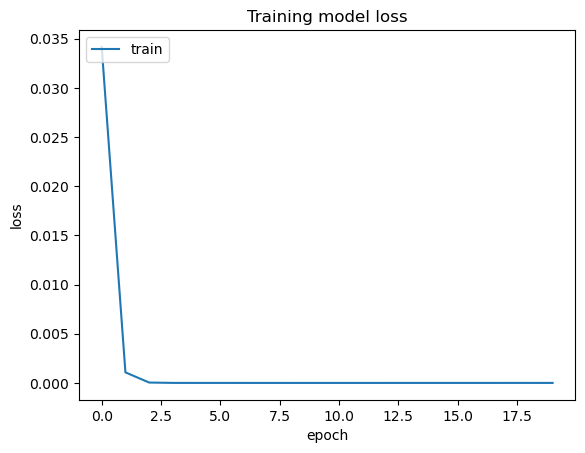

In [91]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [92]:
testData=pd.read_csv('/Users/jayant/Downloads/datasetsandcodefilesstockmarketprediction/Google_test_data.csv')
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values
# input array the model
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
lenght=len(testData)
timestep=60
for i in range(timestep,lenght):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [93]:
y_pred=model.predict(X_test)
y_pred

6/6 [==============================] - 1s 22ms/step


array([[0.76754797],
       [0.76445866],
       [0.76151943],
       [0.7588012 ],
       [0.7563339 ],
       [0.7540854 ],
       [0.7520018 ],
       [0.7500403 ],
       [0.74819976],
       [0.7464892 ],
       [0.7448627 ],
       [0.7432722 ],
       [0.74169725],
       [0.7401139 ],
       [0.7385411 ],
       [0.73700595],
       [0.73559403],
       [0.73439664],
       [0.7334937 ],
       [0.7329546 ],
       [0.7327424 ],
       [0.7328045 ],
       [0.73303723],
       [0.7333375 ],
       [0.7336365 ],
       [0.73390687],
       [0.7341405 ],
       [0.7343114 ],
       [0.73435915],
       [0.73424447],
       [0.7339393 ],
       [0.73341453],
       [0.7326128 ],
       [0.7314848 ],
       [0.7300937 ],
       [0.7285485 ],
       [0.7269527 ],
       [0.72539175],
       [0.7239436 ],
       [0.72262514],
       [0.7215034 ],
       [0.7206403 ],
       [0.72009027],
       [0.71988094],
       [0.7200092 ],
       [0.7204311 ],
       [0.72106856],
       [0.721

In [94]:
#To plot the data between actual and stock prices
predicted_price=sc.inverse_transform(y_pred)

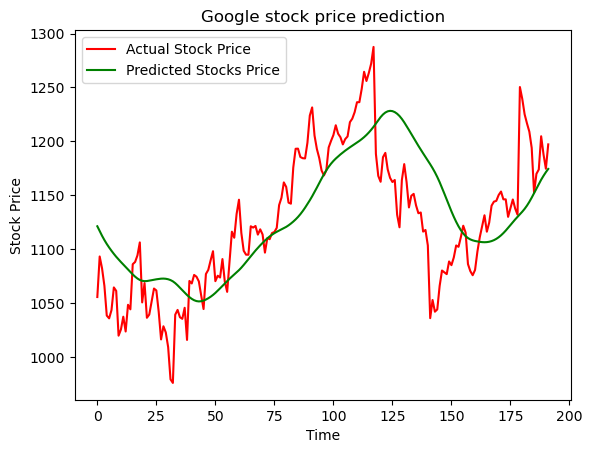

In [95]:
plt.plot(y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price,color='green',label='Predicted Stocks Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()